In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import tensorflow as tf
from tensorflow import keras

In [19]:


fashion_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [20]:


X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.



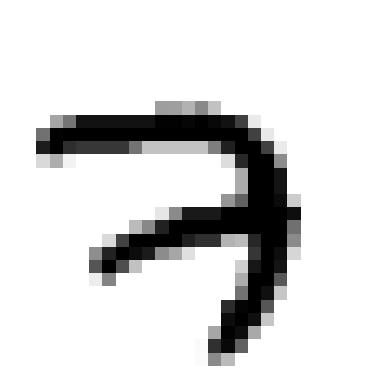

In [21]:


plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()



In [23]:


class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]




Saving figure fashion_mnist_plot


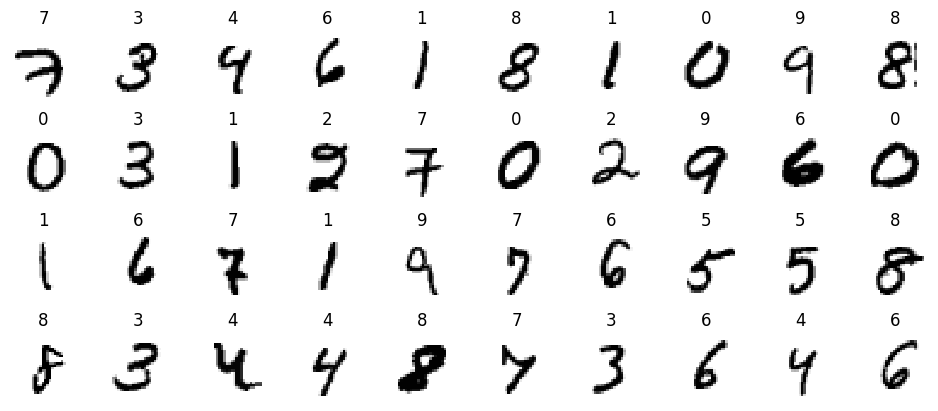

In [24]:


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()



Epoch 1/30


c:\Users\biggi\miniconda3\envs\labb7\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6372 - loss: 1.1911 - val_accuracy: 0.9122 - val_loss: 0.3288
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8796 - loss: 0.4003 - val_accuracy: 0.9316 - val_loss: 0.2499
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9092 - loss: 0.3104 - val_accuracy: 0.9420 - val_loss: 0.2100
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9208 - loss: 0.2667 - val_accuracy: 0.9504 - val_loss: 0.1794
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9305 - loss: 0.2363 - val_accuracy: 0.9566 - val_loss: 0.1607
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9396 - loss: 0.2101 - val_accuracy: 0.9588 - val_loss: 0.1467
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9453 - loss: 0.1863 - val_accuracy: 0.9638 - val_loss: 0.1333
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9509 - loss: 0.1705 - val_accurac

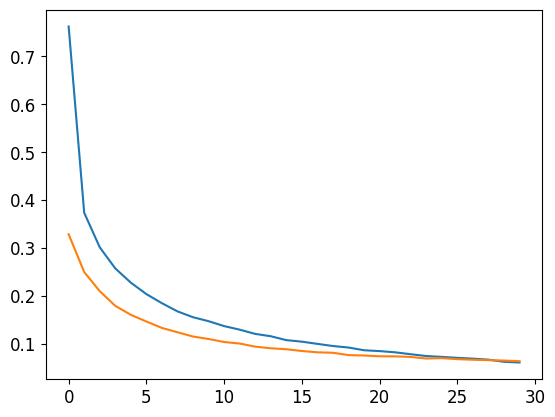

In [25]:
# Neural Network model with Flatten, Dense, and Dropout layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])  


model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",  
                metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')


In [26]:
# Hyperparameter tuning with Keras Tuner
import keras_tuner as kt
def build_model(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    
    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 5)):
        # Tune the number of units in each layer
        units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(units, activation='relu'))
        model.add(keras.layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    # Tune the learning rate for the optimizer
    lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
#Show results of hyperparameter tuning
tuner = kt.Hyperband(build_model,      
                     objective='val_accuracy', 
                     max_epochs=10, 
                     factor=3, 
                     directory='my_dir', 
                     project_name='intro_to_kt')
tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""The hyperparameter search is complete. 
The optimal number of layers is {best_hps.get('num_layers')}.""")
for i in range(best_hps.get('num_layers')):
    print(f"The optimal number of units in layer {i} is {best_hps.get(f'units_{i}')} with dropout rate {best_hps.get(f'dropout_{i}')}.")
# show learning rate
print(f"The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")
# show batch size
print(f"The optimal batch size is {best_hps.get('batch_size')}.")    

Trial 30 Complete [00h 00m 21s]
val_accuracy: 0.8889999985694885

Best val_accuracy So Far: 0.8912000060081482
Total elapsed time: 00h 06m 07s
The hyperparameter search is complete. 
The optimal number of layers is 3.
The optimal number of units in layer 0 is 160 with dropout rate 0.0.
The optimal number of units in layer 1 is 352 with dropout rate 0.1.
The optimal number of units in layer 2 is 512 with dropout rate 0.0.


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7684 - loss: 0.6316 - val_accuracy: 0.8644 - val_loss: 0.3854
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8616 - loss: 0.3794 - val_accuracy: 0.8708 - val_loss: 0.3537
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8741 - loss: 0.3398 - val_accuracy: 0.8838 - val_loss: 0.3315
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8849 - loss: 0.3098 - val_accuracy: 0.8862 - val_loss: 0.3223
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8889 - loss: 0.2957 - val_accuracy: 0.8840 - val_loss: 0.3192
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8954 - loss: 0.2825 - val_accuracy: 0.8870 - val_loss: 0.3149
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8973 - loss: 0.2692 - val_accuracy: 0.8890 - val_loss: 0.3124
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8994 - loss: 0.2669 - 

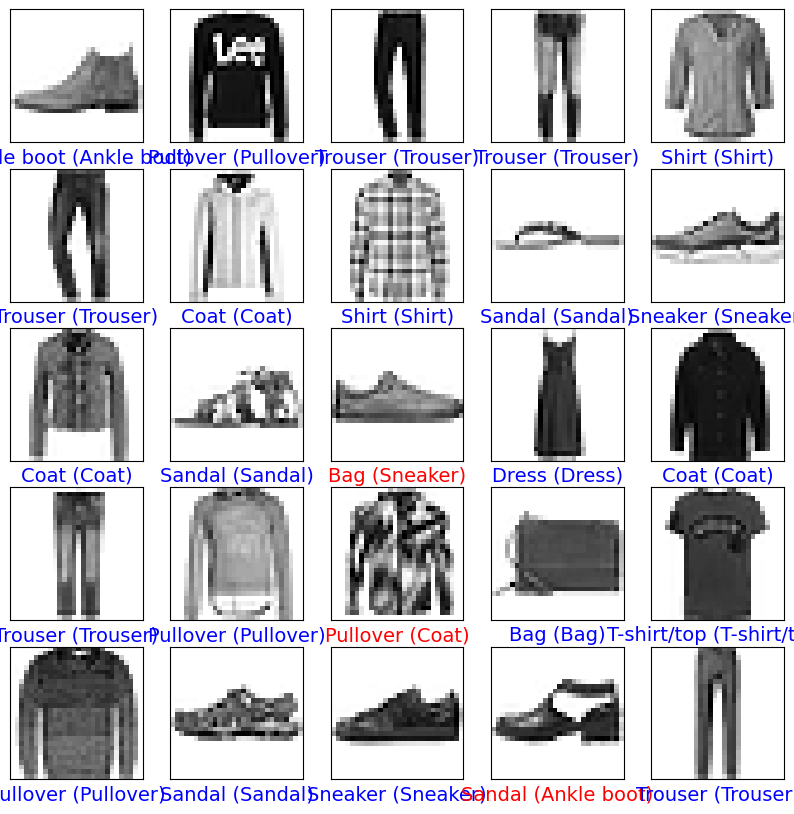

In [14]:
#Show model predictions
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
print("Predictions on test set:", y_pred)
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
#Show model predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)